In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_excel('/content/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [7]:
cols=['Date_of_Journey','Dep_Time', 'Arrival_Time']
for col in cols:
  df[col]=pd.to_datetime(df[col])
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [8]:
df['day_of_journy']=df['Date_of_Journey'].dt.day
df['month_of_journy']=df['Date_of_Journey'].dt.month
df=df.drop('Date_of_Journey',axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journy,month_of_journy
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-07 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-03-07 05:50:00,2022-03-07 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-03-07 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-03-07 18:05:00,2022-03-07 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-03-07 16:50:00,2022-03-07 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [9]:
df['minute_of_arrival']=df['Arrival_Time'].dt.minute
df['hour_of_arrival']=df['Arrival_Time'].dt.hour
df=df.drop('Arrival_Time',axis=1)

In [10]:
df['minute_of_dep']=df['Dep_Time'].dt.minute
df['hour_of_dep']=df['Dep_Time'].dt.hour
df=df.drop('Dep_Time',axis=1)

In [11]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journy,month_of_journy,minute_of_arrival,hour_of_arrival,minute_of_dep,hour_of_dep
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,10,1,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,15,13,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,25,4,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,30,23,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,35,21,50,16


In [12]:
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 


In [13]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins
df.drop(["Duration"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day_of_journy,month_of_journy,minute_of_arrival,hour_of_arrival,minute_of_dep,hour_of_dep,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,10,1,20,22,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,15,13,50,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,25,4,25,9,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,30,23,5,18,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,35,21,50,16,4,45


In [14]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
day_of_journy         int64
month_of_journy       int64
minute_of_arrival     int64
hour_of_arrival       int64
minute_of_dep         int64
hour_of_dep           int64
Duration_hours        int64
Duration_mins         int64
dtype: object

In [15]:
print(df["Airline"].value_counts())
print(df["Source"].value_counts())
print(df["Destination"].value_counts())


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


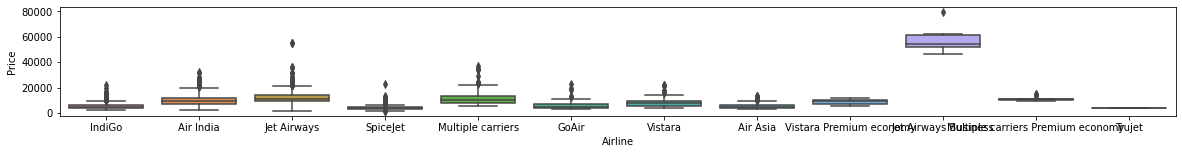

In [16]:
import seaborn as sns
plt.figure(figsize=(20,2))
sns.boxplot(y ='Price',x='Airline',data=df)
plt.show()

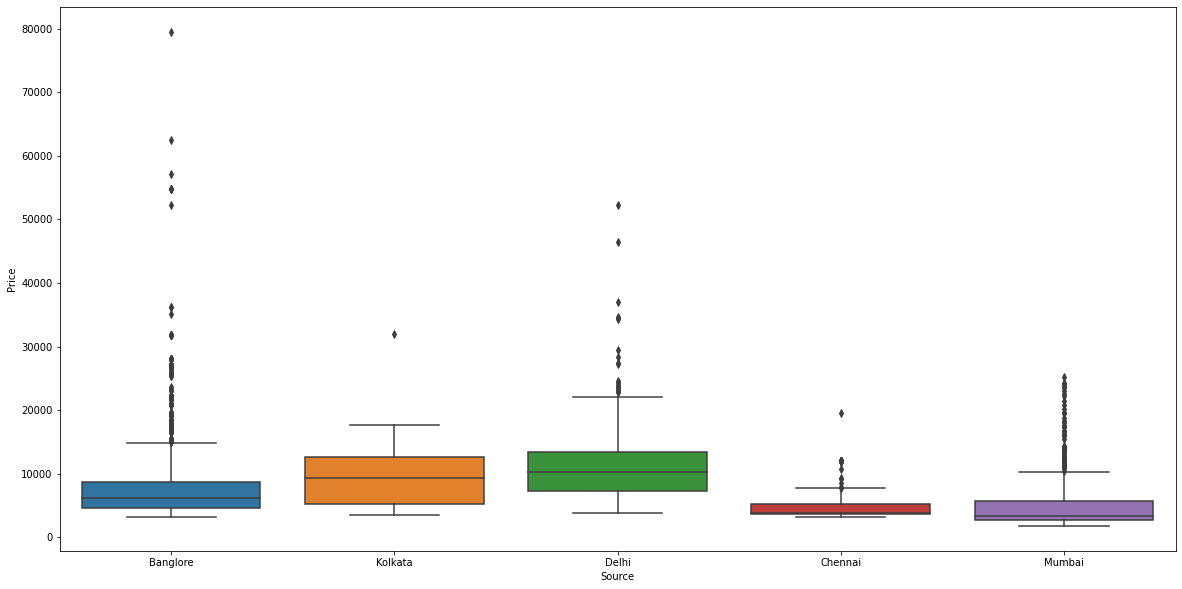

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(y ='Price',x='Source',data=df)
plt.show()

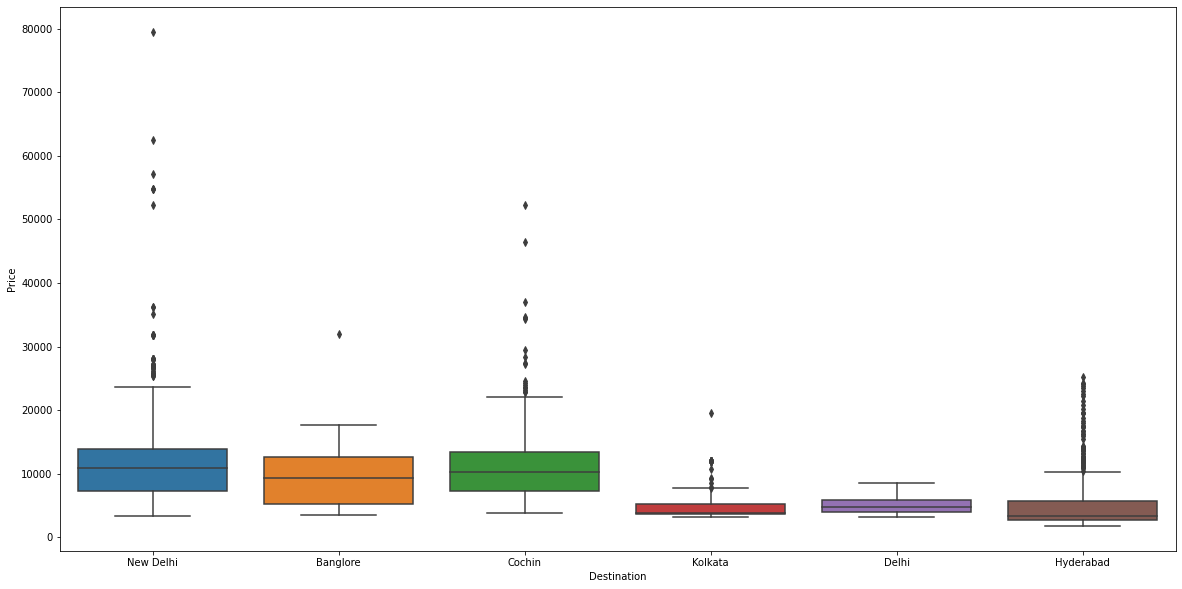

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(y ='Price',x='Destination',data=df)
plt.show()

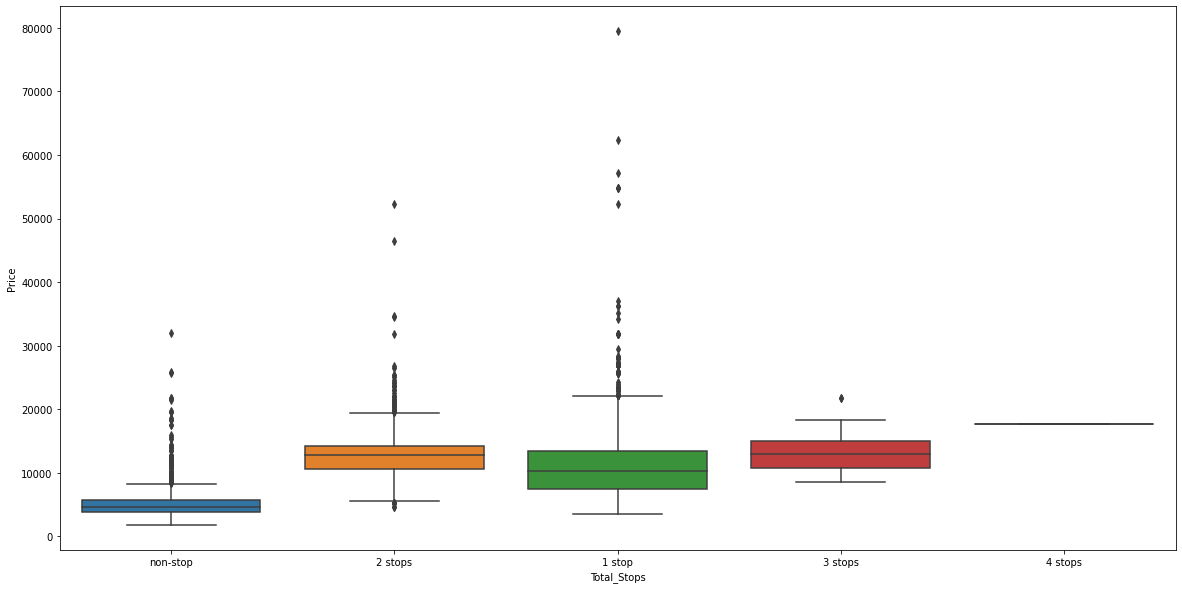

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(y ='Price',x='Total_Stops',data=df)
plt.show()

In [20]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [21]:
df['Route1']=df['Route'].str.split('→').str[0]
df['Route2']=df['Route'].str.split('→').str[1]
df['Route3']=df['Route'].str.split('→').str[2]
df['Route4']=df['Route'].str.split('→').str[3]
df['Route5']=df['Route'].str.split('→').str[4]
df=df.drop('Route',axis=1)
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day_of_journy,month_of_journy,minute_of_arrival,hour_of_arrival,minute_of_dep,hour_of_dep,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,10,1,20,22,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,1,15,13,50,5,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,6,9,25,4,25,9,19,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,5,12,30,23,5,18,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,3,1,35,21,50,16,4,45,BLR,NAG,DEL,NaN,NaN


In [22]:
df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Total_Stops              0
Additional_Info          0
Price                    0
day_of_journy            0
month_of_journy          0
minute_of_arrival        0
hour_of_arrival          0
minute_of_dep            0
hour_of_dep              0
Duration_hours           0
Duration_mins            0
Route1                   0
Route2                   0
Route3                3491
Route4                9116
Route5               10636
dtype: int64

In [23]:
cols=['Route3', 'Route4', 'Route5']
for col in cols:
    df[col].fillna('None',inplace=True)
    

In [24]:
df=df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})
df=df.drop('Additional_Info',axis=1)
df.head()


,Airline,Source,Destination,Total_Stops,Price,day_of_journy,month_of_journy,minute_of_arrival,hour_of_arrival,minute_of_dep,hour_of_dep,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,3897,24,3,10,1,20,22,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,7662,5,1,15,13,50,5,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,13882,6,9,25,4,25,9,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,6218,5,12,30,23,5,18,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,13302,3,1,35,21,50,16,4,45,BLR,NAG,DEL,None,None


In [25]:
df.dtypes

Airline              object
Source               object
Destination          object
Total_Stops           int64
Price                 int64
day_of_journy         int64
month_of_journy       int64
minute_of_arrival     int64
hour_of_arrival       int64
minute_of_dep         int64
hour_of_dep           int64
Duration_hours        int64
Duration_mins         int64
Route1               object
Route2               object
Route3               object
Route4               object
Route5               object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [27]:
for col in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5','Airline','Source','Destination']:
    df[col]=encoder.fit_transform(df[col])
df    

,Airline,Source,Destination,Total_Stops,Price,day_of_journy,month_of_journy,minute_of_arrival,hour_of_arrival,minute_of_dep,hour_of_dep,Duration_hours,Duration_mins,Route1,Route2,Route3,Route4,Route5
0,3,0,5,0,3897,24,3,10,1,20,22,2,50,0,13,29,13,5
1,1,3,0,2,7662,5,1,15,13,50,5,7,25,2,25,1,3,5
2,4,2,1,2,13882,6,9,25,4,25,9,19,0,3,32,4,5,5
3,3,3,0,1,6218,5,12,30,23,5,18,5,25,2,34,3,13,5
4,3,0,5,1,13302,3,1,35,21,50,16,4,45,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,4,9,25,22,55,19,2,30,2,5,29,13,5
10679,1,3,0,0,4145,27,4,20,23,45,20,2,35,2,5,29,13,5
10680,4,0,2,0,7229,27,4,20,11,20,8,3,0,0,13,29,13,5
10681,10,0,5,0,12648,3,1,10,14,30,11,2,40,0,13,29,13,5


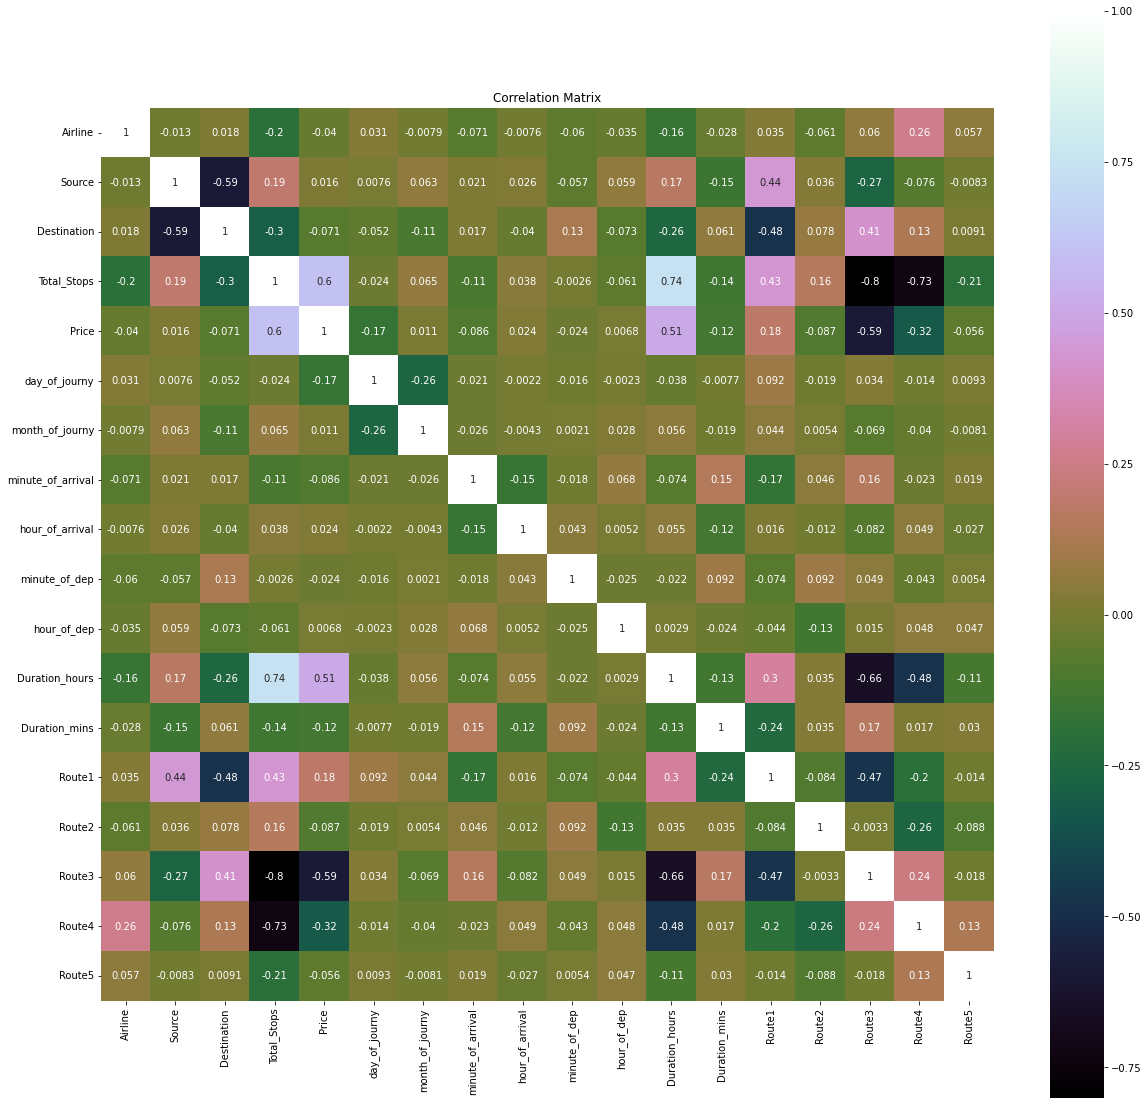

In [28]:
correlation = df.corr()
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [29]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
x = df.drop('Price', axis=1)
y = df['Price']
all_features = x.columns
selector = SelectKBest(k=16, score_func=f_regression)
selector.fit(x, y)
selector.scores_
pd.DataFrame(selector.scores_, index=x.columns)

,0
Airline,16.744381
Source,2.734523
Destination,54.298423
Total_Stops,6130.729912
day_of_journy,300.570910
month_of_journy,1.224116
minute_of_arrival,79.867692
hour_of_arrival,6.280954
minute_of_dep,6.392435
hour_of_dep,0.493755


In [30]:
selected_features_idx = selector.get_support(indices=True)
selected_features = all_features[selected_features_idx]
x=x[selected_features]

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=45)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor

In [33]:
models={
    'mu':MultinomialNB(),
    'KNN':KNeighborsRegressor(),
    'DT':DecisionTreeRegressor(),
    'EN':RandomForestRegressor(),
    'SVM':SVR(),
    'XG':XGBRegressor()
    
}

In [34]:
for name,model in models.items():
    print(f'using:{name}')
    model.fit(x_train,y_train)
    print(f'train accurancy:{model.score(x_train,y_train)}')
    print(f'test accurancy:{model.score(x_test,y_test)}')
    print('-'*30,'\n')

using:mu
train accurancy:0.22422469280280866
test accurancy:0.08423022929340196
------------------------------ 

using:KNN
train accurancy:0.7732784030396159
test accurancy:0.5766706228052974
------------------------------ 

using:DT
train accurancy:0.9704243024760977
test accurancy:0.6447443891587361
------------------------------ 

using:EN
train accurancy:0.9554533778898981
test accurancy:0.7415435165481636
------------------------------ 

using:SVM
train accurancy:0.047110485568941596
test accurancy:0.035929003756100975
------------------------------ 

using:XG
[10:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train accurancy:0.8204254520042846
test accurancy:0.711296627803703
------------------------------ 



In [37]:
model_params = {
    'RFR': {
        'model':RandomForestRegressor(),
        'params' : {
            'n_estimators': [100,200,300]
            
        }  
    },
    'DecisionTreeRegressor': {
            'model':DecisionTreeRegressor(),
            'params' : {
        'criterion': ['squared_error','absolute_error','poisson'],
        'max_depth': [20,50,100],
        'min_samples_split': [2,4,6]
        
        
            },
}

}

In [38]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,RFR,0.818899,{'n_estimators': 300}
1,DecisionTreeRegressor,0.753176,"{'criterion': 'squared_error', 'max_depth': 20..."


In [39]:
model=RandomForestRegressor(n_estimators=300).fit(x_train,y_train)